# Importing Librairies

In [ ]:
#Libraries
from sklearn.model_selection import KFold
from copy import deepcopy as dc
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima_process import ArmaProcess
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch
import torch.nn as nn

In [ ]:
# Load the CSV data from the specified path
ecodata = pd.read_csv("/content/ECONOMICS_Mulivariate_2.csv")
ecodata.shape
ecodata

,time,USCPIYOY,USINTR,USM2YOY
0,1971-08-01,4.6,5.75,8.59
1,1971-09-01,4.1,5.13,8.86
2,1971-10-01,3.8,5.13,9.15
3,1971-11-01,3.3,4.50,9.57
4,1971-12-01,3.3,3.50,9.79
...,...,...,...,...
625,2023-09-01,3.7,5.50,-7.10
626,2023-10-01,3.2,5.50,-6.50
627,2023-11-01,3.1,5.50,-6.00
628,2023-12-01,3.4,5.50,-5.60


# Data Visualization

In [ ]:
ecodata.set_index('time', inplace=True)

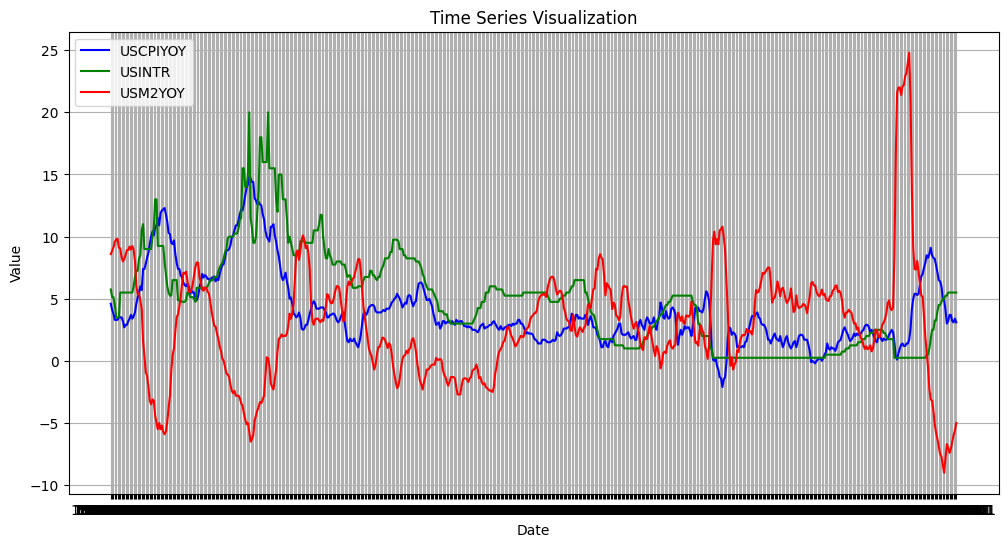

In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(ecodata.index, ecodata['USCPIYOY'], label='USCPIYOY', color='blue')
plt.plot(ecodata.index, ecodata['USINTR'], label='USINTR', color='green')
plt.plot(ecodata.index, ecodata['USM2YOY'], label='USM2YOY', color='red')

plt.title('Time Series Visualization')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()

# **Heatmaps**

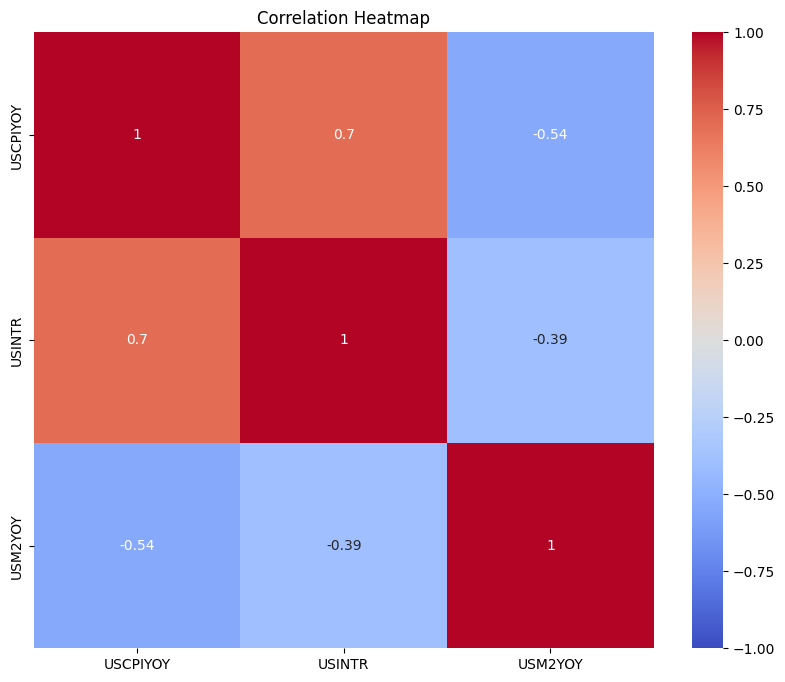

In [ ]:
import seaborn as sns
import numpy as np

# Compute correlation matrix
correlation_matrix = ecodata.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

# Joint Plot
Joint plots display a relationship between two variables, including their individual distributions.

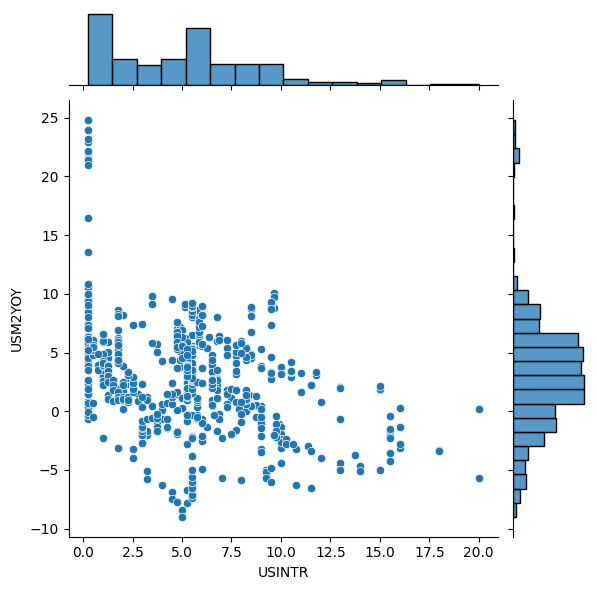

In [ ]:
sns.jointplot(x='USINTR', y='USM2YOY', data=ecodata, kind='scatter')
plt.show()

# Pairwise Correlation as a Network Graph

pairwise correlations as edges between nodes (features).

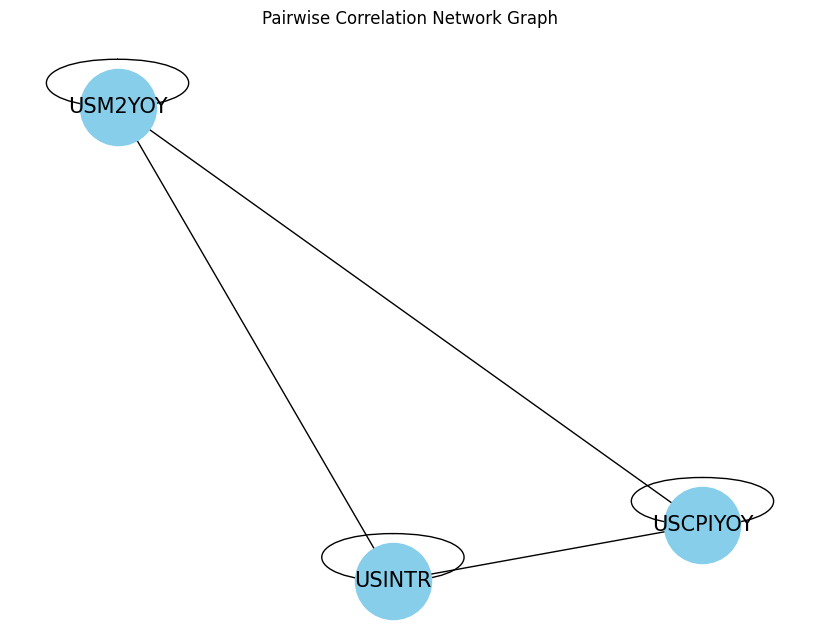

In [ ]:
import networkx as nx

G = nx.from_pandas_adjacency(correlation_matrix)

plt.figure(figsize=(8, 6))
nx.draw(G, with_labels=True, node_color='skyblue', node_size=3000, edge_color='black', linewidths=1, font_size=15)
plt.title('Pairwise Correlation Network Graph')
plt.show()

# **Area Charts**

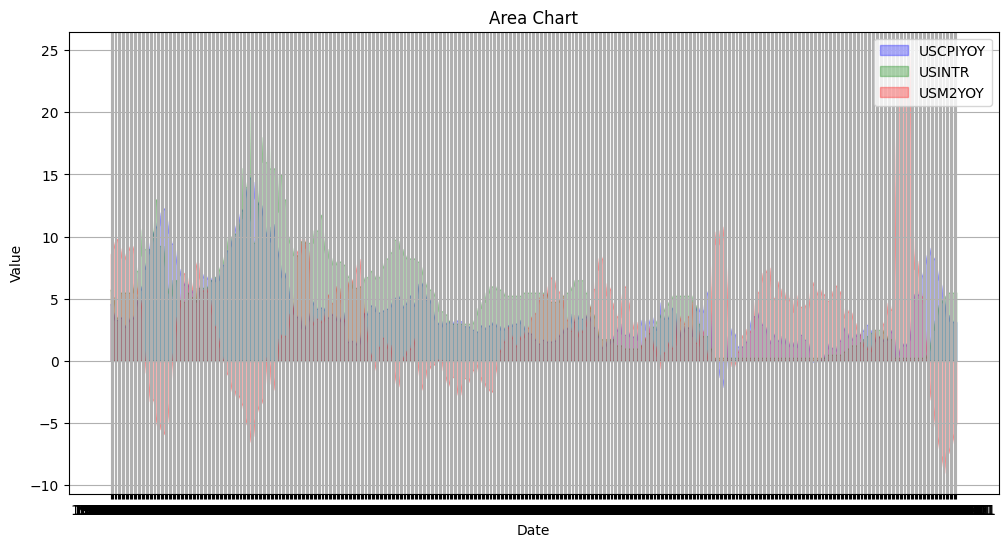

In [ ]:
plt.figure(figsize=(12, 6))
plt.fill_between(ecodata.index, ecodata['USCPIYOY'], color='blue', alpha=0.3, label='USCPIYOY')
plt.fill_between(ecodata.index, ecodata['USINTR'], color='green', alpha=0.3, label='USINTR')
plt.fill_between(ecodata.index, ecodata['USM2YOY'], color='red', alpha=0.3, label='USM2YOY')

plt.title('Area Chart')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


# Histograms and Density Plots

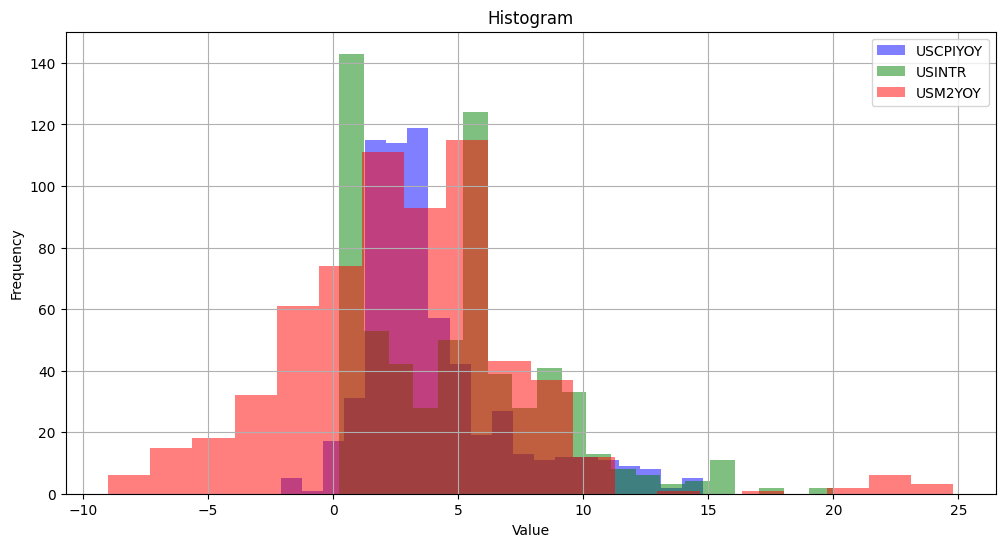

In [ ]:
plt.figure(figsize=(12, 6))
ecodata['USCPIYOY'].hist(bins=20, alpha=0.5, label='USCPIYOY', color='blue')
ecodata['USINTR'].hist(bins=20, alpha=0.5, label='USINTR', color='green')
ecodata['USM2YOY'].hist(bins=20, alpha=0.5, label='USM2YOY', color='red')

plt.title('Histogram')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# **Box Plots**

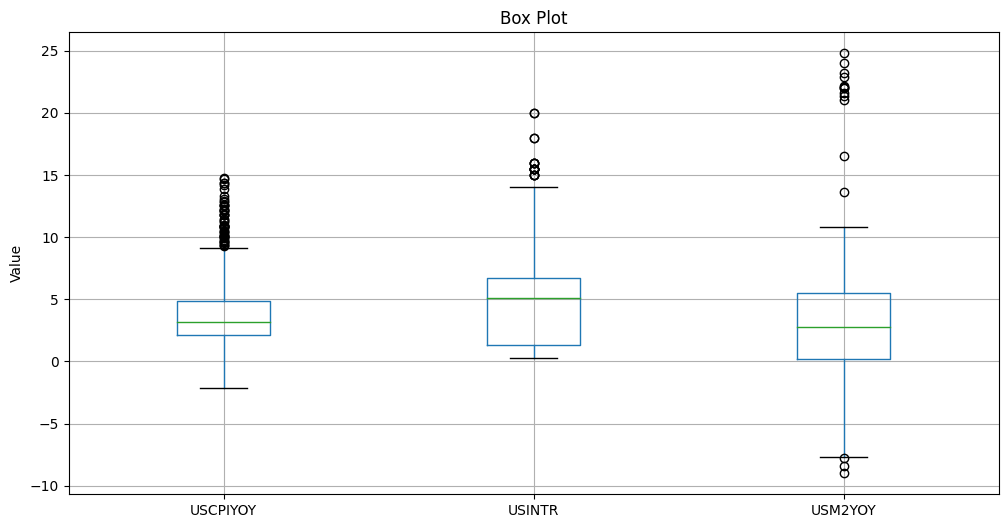

In [ ]:
plt.figure(figsize=(12, 6))
ecodata.boxplot(column=['USCPIYOY', 'USINTR', 'USM2YOY'])

plt.title('Box Plot')
plt.ylabel('Value')
plt.grid(True)
plt.show()

#  Interactive Dashboards (using Plotly)

In [ ]:
import plotly.express as px

fig = px.line(ecodata, x=ecodata.index, y=['USCPIYOY', 'USINTR', 'USM2YOY'], title='Interactive Time Series Dashboard')
fig.update_xaxes(title='Date')
fig.update_yaxes(title='Value')
fig.show()

# Seasonal Decomposition

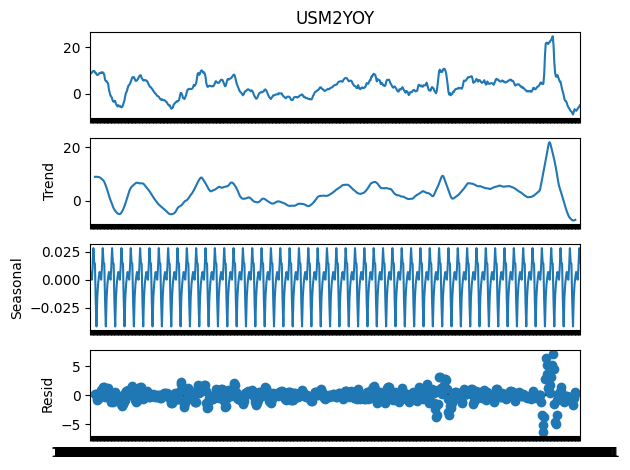

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ecodata['USM2YOY'], model='additive', period=12)  # Assuming yearly seasonality
result.plot()
plt.show()

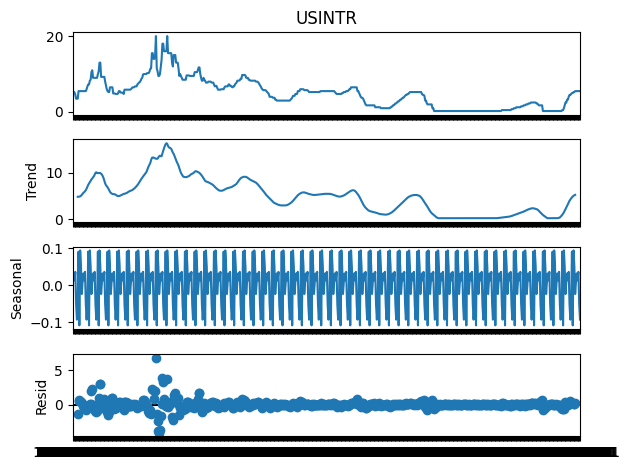

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ecodata['USINTR'], model='additive', period=12)  # Assuming yearly seasonality
result.plot()
plt.show()

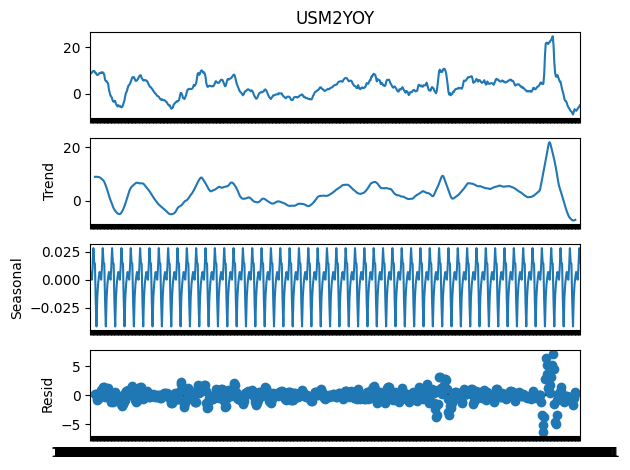

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(ecodata['USM2YOY'], model='additive', period=12)  # Assuming yearly seasonality
result.plot()
plt.show()